1) Parse data in the text file. The text file contains information about data preceeding the data itself. The data for the housing has two rows for each data entry. The first step is to get rid of the text above the data, join lines into entries, get rid of the spaces and convert text into numbers. Finally, put the data into a numpy array to make analysis easy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

ImportError: No module named 'matplotlib'

In [6]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [27]:
# Parse data from the text file
with open('boston_dataset.txt', 'r') as boston_housing_data_file:

    # Get rid of the text, concatenate every two lines
    boston_housing_data_text = []
    line_counter = 0
    for line in boston_housing_data_file.readlines():
        if (line_counter>21):
            if (line_counter%2 == 0):
                line_temp = line.split()
            else:
                line_temp = line_temp + line.split()
                boston_housing_data_text.append(line_temp)
        line_counter+=1
    # Convert into numbers and put into a np array
    # Populate the array initially
    boston_housing_data = np.zeros(14)
    for entry in boston_housing_data_text:
        entry_numbers = []
        for data in entry:
            # Convert every field into a number
            entry_numbers.append(float(data))
        # Append vertically
        boston_housing_data = np.vstack((boston_housing_data, entry_numbers))
    # Get rid of the initial zeros
    boston_housing_data = boston_housing_data[1:, :]
    # Variable Boston Housing data contains data about each entity in one line
    print(boston_housing_data)

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   3.96900000e+02
    4.98000000e+00   2.40000000e+01]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   3.96900000e+02
    9.14000000e+00   2.16000000e+01]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   3.92830000e+02
    4.03000000e+00   3.47000000e+01]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   3.96900000e+02
    5.64000000e+00   2.39000000e+01]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   3.93450000e+02
    6.48000000e+00   2.20000000e+01]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   3.96900000e+02
    7.88000000e+00   1.19000000e+01]]


2) The next step is to gain some visual insights about what correlates with the value of the owner-occupied homes. Below are some that visually seem the most impactful, or are worth noting, in my opinion.

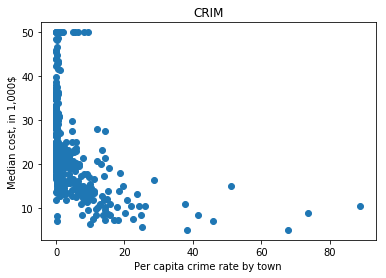

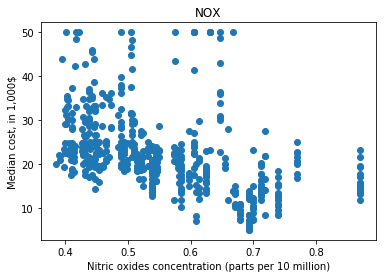

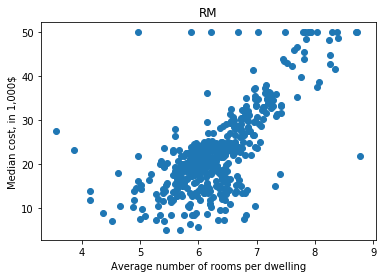

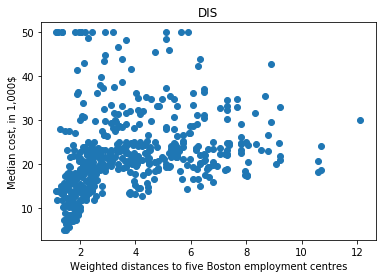

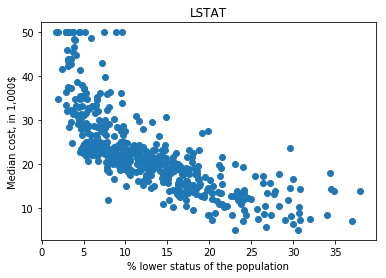

In [55]:
plt.plot(boston_housing_data[:, 0], boston_housing_data[:, 13], linestyle = '', marker = 'o')
plt.title('CRIM')
plt.xlabel('Per capita crime rate by town')
plt.ylabel('Median cost, in 1,000$')
plt.show()
plt.plot(boston_housing_data[:, 4], boston_housing_data[:, 13], linestyle = '', marker = 'o')
plt.title('NOX')
plt.xlabel('Nitric oxides concentration (parts per 10 million)')
plt.ylabel('Median cost, in 1,000$')
plt.show()
plt.plot(boston_housing_data[:, 5], boston_housing_data[:, 13], linestyle = '', marker = 'o')
plt.title('RM')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median cost, in 1,000$')
plt.show()
plt.plot(boston_housing_data[:, 7], boston_housing_data[:, 13], linestyle = '', marker = 'o')
plt.title('DIS')
plt.xlabel('Weighted distances to five Boston employment centres')
plt.ylabel('Median cost, in 1,000$')
plt.show()
plt.plot(boston_housing_data[:, 12], boston_housing_data[:, 13], linestyle = '', marker = 'o')
plt.title('LSTAT')
plt.xlabel('% lower status of the population')
plt.ylabel('Median cost, in 1,000$')
plt.show()

3) Get some general insights about the price and nitrogen oxide concentration, their means, medians, distributions and standard deviations

Sample size: 506
Mean value of houses: $22532
Median value of an owner house in Boston: $21200
Standard deviation of the house values: $9188


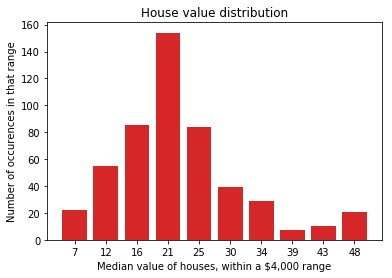

In [128]:
# Divide the range in 10 boxes to create a bar graph of the housing prices
box_number = 10
price_box_limits = np.zeros(box_number)
price_min = np.amin(boston_housing_data[:,13])
price_max = np.amax(boston_housing_data[:,13])
box_i = 0
x_ticks = np.zeros(box_number)
for box_limit in price_box_limits:
    price_box_limits[box_i] = price_min + (box_i+1)*(price_max-price_min)/box_number
    x_ticks[box_i]+=price_box_limits[box_i]
    box_i+=1
    if(box_i<box_number):
        x_ticks[box_i]+=price_box_limits[box_i-1]
x_ticks[0]+=price_min
x_ticks = x_ticks/2.0

# Create labels for each bar in the graph
x_ticks_ints = []
for value in x_ticks:
    x_ticks_ints.append(int(round(value)))
    
# Count the number of price occurences in each range
price_box = np.zeros(box_number)
for data_entry in boston_housing_data[:,13]:
    box_number = 0
    while data_entry > price_box_limits[box_number]:
        box_number += 1
    price_box[box_number] += 1
    
# Calculate values of statistical significance for the set: mean, median and variance
print('Sample size: ' + str(len(boston_housing_data[:,13])))

mean = np.sum(boston_housing_data[:, 13])/len(boston_housing_data[:, 13])
print('Mean value of houses: $'+str(int(mean*1000)))

boston_prices = boston_housing_data[:, 13]
boston_prices = np.sort(boston_prices)
if (len(boston_housing_data[:, 13])&2 == 1):
    median_sample = int((len(boston_housing_data[:, 13])-1)/2)
    median = boston_prices[median_sample]
else:
    median_sample = int(len(boston_housing_data[:, 13])/2)
    median = (boston_prices[median_sample]+boston_prices[median_sample-1])/2
print('Median value of an owner house in Boston: $'+ str(int(median*1000)))

variance = (np.sum((np.square(boston_prices)))/len(boston_prices)) - mean**2
stdv = math.sqrt(variance)
print('Standard deviation of the house values: $' + str(int(1000*stdv)))

ind = np.arange(10) # The x locations for each bar
plt.bar(ind, price_box)
plt.xticks(ind, x_ticks_ints)
plt.xlabel('Median value of houses, within a $4,000 range')
plt.ylabel('Number of occurences in that range')
plt.title('House value distribution')
plt.show()

Mean value of polution: 0.554695059289
Median polution: 0.538
Standard deviation of polution: 0.11576311540656131


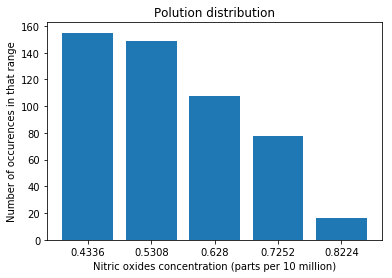

In [129]:
# Divide the range in 5 boxes to create a bar graph of the housing prices
box_number = 5
price_box_limits = np.zeros(box_number)
price_min = np.amin(boston_housing_data[:,4])
price_max = np.amax(boston_housing_data[:,4])
box_i = 0
x_ticks = np.zeros(box_number)
for box_limit in price_box_limits:
    price_box_limits[box_i] = price_min + (box_i+1)*(price_max-price_min)/box_number
    x_ticks[box_i]+=price_box_limits[box_i]
    box_i+=1
    if(box_i<box_number):
        x_ticks[box_i]+=price_box_limits[box_i-1]
x_ticks[0]+=price_min
x_ticks = x_ticks/2.0

# Create labels for each bar in the graph
x_ticks_ints = []
for value in x_ticks:
    x_ticks_ints.append((value))
    
# Count the number of price occurences in each range
price_box = np.zeros(box_number)
for data_entry in boston_housing_data[:,4]:
    box_number = 0
    while data_entry > price_box_limits[box_number]:
        box_number += 1
    price_box[box_number] += 1
    
mean = np.sum(boston_housing_data[:, 4])/len(boston_housing_data[:, 4])
print('Mean value of polution: '+str(mean))

polution = boston_housing_data[:, 4]
polution = np.sort(polution)
if (len(boston_housing_data[:, 4])&2 == 1):
    median_sample = int((len(boston_housing_data[:, 4])-1)/2)
    median = polution[median_sample]
else:
    median_sample = int(len(boston_housing_data[:, 4])/2)
    median = (polution[median_sample]+polution[median_sample-1])/2
print('Median polution: '+ str(median))

variance = (np.sum((np.square(polution)))/len(polution)) - mean**2
stdv = math.sqrt(variance)
print('Standard deviation of polution: ' + str(stdv))

ind = np.arange(5) # The x locations for each bar
plt.bar(ind, price_box)
plt.xticks(ind, x_ticks_ints)
plt.xlabel('Nitric oxides concentration (parts per 10 million)')
plt.ylabel('Number of occurences in that range')
plt.title('Polution distribution')
plt.show()

In [ ]:
4) A quick insight into how the 

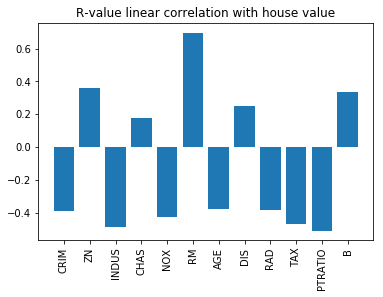

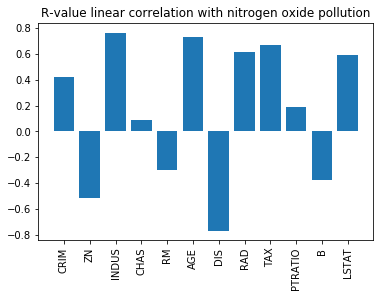

In [144]:
price_correlations = []
for i in range(0, 12):
    slope, intercept, r_value, p_value, std_err = stats.linregress(boston_housing_data[:, i], boston_housing_data[:, 13])
    price_correlations.append(r_value)
ind = np.arange(12)
plt.bar(ind, price_correlations)
plt.title('R-value linear correlation with house value')
plt.xticks(ind, ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], rotation='vertical')
plt.show()

nox_correlations = []
for i in range(0, 13):
    if i!=4:
        slope, intercept, r_value, p_value, std_err = stats.linregress(boston_housing_data[:, i], boston_housing_data[:, 4])
        nox_correlations.append(r_value)
ind = np.arange(12)
plt.bar(ind, nox_correlations)
plt.title('R-value linear correlation with nitrogen oxide pollution')
plt.xticks(ind, ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], rotation='vertical')
plt.show()